In [109]:
#LASSO AND RIDGE REGRESSION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from seaborn import kdeplot

In [110]:
# import warnings
# warnings.filterwarnings(action = "ignore")

In [111]:
boston=load_boston()
x=pd.DataFrame(data=boston.data,columns=boston.feature_names)
y=pd.DataFrame(data=boston.target,columns=['Price'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


###### SPLITTING THE DATASET AMONG TRAINING AND TEST DATA

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((354, 13), (354, 1), (152, 13), (152, 1))

In [113]:
x_train=x_train.values
x_test=x_test.values
y_train=y_train.values
y_test=y_test.values

###### SIMPLE LINEAR REGRESSION

In [114]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
residual=y_predict-y_test
print("RMSE=",((residual**2).mean())**0.5)
print("R^2 Training =",lr.score(x_train,y_train))
print("R^2 Testing  =",lr.score(x_test,y_test))
# kdeplot(residual.iloc[:,0])

RMSE= 4.7362364880501335
R^2 Training = 0.7419034960343789
R^2 Testing  = 0.7147895265576858


###### RIDGE REGRESSION

In [115]:
rr=Ridge(alpha=0.01)
rr.fit(x_train,y_train)
y_predict=rr.predict(x_test)
residual=y_predict-y_test
print("RMSE=",((residual**2).mean())**0.5)
print("R^2 Training =",rr.score(x_train,y_train))
print("R^2 Testing  =",rr.score(x_test,y_test))

RMSE= 4.737705811571775
R^2 Training = 0.7419030253527293
R^2 Testing  = 0.7146125373123906


###### LASSO REGRESSION

In [116]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_predict=rr.predict(x_test)
residual=y_predict-y_test
print("RMSE=",((residual**2).mean())**0.5)
print("R^2 Training =",lasso.score(x_train,y_train))
print("R^2 Testing  =",lasso.score(x_test,y_test))

RMSE= 4.737705811571775
R^2 Training = 0.6832133784853487
R^2 Testing  = 0.6364462662362061


###### GRAPHS

Text(0, 0.5, 'Magnitude')

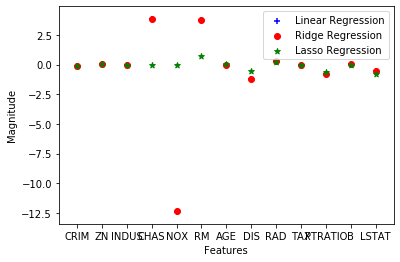

In [117]:
plt.scatter(x.columns,lr.coef_,color="blue",marker="+",label="Linear Regression")
plt.scatter(x.columns,rr.coef_,color="red",marker="o",label="Ridge Regression")
plt.scatter(x.columns,lasso.coef_,color="green",marker="*",label="Lasso Regression")
plt.legend()
plt.xlabel("Features")
plt.ylabel("Magnitude")

In [320]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [348]:
x_train.shape,np.ones(x_train.shape[0]).reshape(-1,1).shape

((354, 13), (354, 1))

In [350]:
x_train=np.concatenate((x_train,np.ones(x_train.shape[0]).reshape(-1,1)),axis=1)

In [353]:
x_test=np.concatenate((x_test,np.ones(x_test.shape[0]).reshape(-1,1)),axis=1)

###### SGD REGRESSOR

In [369]:

sgd = SGDRegressor(max_iter=1000,learning_rate='adaptive',
                   n_iter_no_change=1000,
                   alpha=0.15,penalty='l2',random_state=21,average=100,eta0=0.000005,warm_start=True)

sgd.fit(x_train,y_train)
y_predict=sgd.predict(x_test)
residual=y_predict-y_test
print("RMSE=",((residual**2).mean())**0.5)
print("R^2 Training =",sgd.score(x_train,y_train))
print("R^2 Testing  =",sgd.score(x_test,y_test))

RMSE= 11.584355458800204
R^2 Training = 0.6339713445621892
R^2 Testing  = 0.5162492134068999
